In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk
import re
from time import time
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg import SparseVector
from pyspark.mllib.regression import LabeledPoint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from numpy import array
from math import sqrt
from pyspark.mllib.linalg import Matrix, Matrices
from sklearn.manifold import MDS

#Path of input file
csv_in = 'H:\Spark\Dataset\\data.csv'
twts_df01 = pd.read_csv(csv_in, encoding='utf-8',error_bad_lines=False,low_memory=False)
#Show the columns size
len(twts_df01.columns)

544

In [16]:
#Remove other columns, and only keep the tweet text column
twts_df01=twts_df01[['_source.text']]
twts_df01

_source.text
0       RT @greenpeacepress: #PanamaPapers link shell ...
1       RT @Claudiarojo_10: Ya renunció #Macri ??? #Ar...
2       RT @latterell: Hope so. Payin 400 #journalists...
3                https://t.co/RvUd1m2kmY\n\n#panamapapers
4       RT @GrayInGlasgow: David Cameron biographer Is...
5       RT @elnuevoherald: Diarios: firma panameña usu...
6       RT @BBCAfrica: How oil firm moved to Mauritius...
7       RT @doberah: Cafe in Berlin-Prenzlauer Berg ha...
8       En verdad hay personas que votarán por esta ra...
9              humo.....humo..... https://t.co/Cbk5M9kril
10      RT @GrayInGlasgow: Channel 4 News have asked a...
11      Más funcionarios macristas con cuentas offshor...
12      @Beharton @ingrid_kok onze koning komt vanzelf...
13      If the govt can see everything we earn then we...
14      RT @leJDD: INFO JDD - @SocieteGenerale perquis...
15      RT @YourAnonCentral: Cameron releases tax retu...
16      RT @France24_ar: الإعلام الخليجي يتجاهل فضيحة ...
17      RT @panama__papers: Papeles de Panamá: RT @ncv...
18      RT @rriccaardo: #11AeroparqueVuelveCFK Todos a...
19      RT @eugenebuingo: En ce moment en #RDC le gouv...
20      RT @bbcmundo: #PanamaPapers: 6 formas en las q...
21      RT @_Femiogunbiyi: As political satire, it doe...
22      RT @Razarumi: Looking at the #panamapapers  li...
23      RT @oz_football: 30 periodistas valientes (6 E...
24      Panama Papers: Leaks reveal Abbas' son's $1m h...
25      paso-&gt;D.Martinez @dariomartinezpj dip/nac f...
26      RT @EdgardoRovira: Es Macri y no CFK el q apar...
27      Todos corruptos y mentirosos, Doble moral! htt...
28      RT @RunRunesWeb: Estas son las historias de ve...
29      RT @LeFildActu1: 5.#PanamaPapers Cynisme, arro...
...                                                   ...
199970  RT @BNR: #ABN Amro verbergt aandeelhouders in ...
199971  RT @cenozoica: Los saqueadores matando de hamb...
199972  RT @LupaNews: E a investigação dos 8.667 brasi...
199973  La periodista del 13 que maneja los #PanamaPap...
199974  RT @RJosmel: Ex jefe de Plan Bolívar 2000 abri...
199975  RT @karinaazuara: Exhibe @revistaproceso menti...
199976  WATCH LIVE: #PanamaPapers: mammoth leaks &amp;...
199977  RT @adn_maye: Ahora entienden porque 18 años c...
199978  #PanamaPapers: 6 formas en las que los ricos y...
199979  RT @RunRunesWeb: Ex jefe de Plan Bolívar 2000 ...
199980  RT @AP: The latest on #PanamaPapers: New Zeala...
199981  RT @EquipoCFK: Miles de británicos exigen la r...
199982  This describes most of everything that's wrong...
199983  Of course there won't be an official inquiry. ...
199984  RT @todasconvielma: Buscar a .@VielmaEsTachira...
199985  Like Nawaz Netanyahu also target of "Aalmi Saz...
199986  RT @karinaazuara: Exhibe @revistaproceso menti...
199987  RT @jopoliszuk: El título de propiedad de la e...
199988  #PanamaPapers: Why #Pakistan doesn’t care \nht...
199989  RT @jopoliszuk: Quedó libre en EEUU, pero @ron...
199990  RT @CasaRosadaAR: Ministro de Justicia  https:...
199991  ＠null ＠null RT: rt_com :All eyes on Putin? Wes...
199992  RT @mexicoenlinea: #PanamaPapers destapa las p...
199993  There is one Google Review of @NZInlandRevenue...
199994  RT @parischiquitoo: #PanaLasso #PanamaPapers.....
199995  RT @chris_underwood: Panama Peril for Opengov ...
199996  RT @TamoaC: Y aquí esta perla de los venezolan...
199997  RT @karinaazuara: #PanamaPapers derrumban cand...
199998     RT @AFP: #PanamaPapers https://t.co/fCHZuSv4lo
199999  RT @TheMurdochTimes: #PanamaPapers brings Isra...

[200000 rows x 1 columns]

In [17]:
#Select 20000 rows to train model
twts_df01 = twts_df01.drop(twts_df01.index[20000:])

In [19]:
twts_df01

_source.text
0      RT @greenpeacepress: #PanamaPapers link shell ...
1      RT @Claudiarojo_10: Ya renunció #Macri ??? #Ar...
2      RT @latterell: Hope so. Payin 400 #journalists...
3               https://t.co/RvUd1m2kmY\n\n#panamapapers
4      RT @GrayInGlasgow: David Cameron biographer Is...
5      RT @elnuevoherald: Diarios: firma panameña usu...
6      RT @BBCAfrica: How oil firm moved to Mauritius...
7      RT @doberah: Cafe in Berlin-Prenzlauer Berg ha...
8      En verdad hay personas que votarán por esta ra...
9             humo.....humo..... https://t.co/Cbk5M9kril
10     RT @GrayInGlasgow: Channel 4 News have asked a...
11     Más funcionarios macristas con cuentas offshor...
12     @Beharton @ingrid_kok onze koning komt vanzelf...
13     If the govt can see everything we earn then we...
14     RT @leJDD: INFO JDD - @SocieteGenerale perquis...
15     RT @YourAnonCentral: Cameron releases tax retu...
16     RT @France24_ar: الإعلام الخليجي يتجاهل فضيحة ...
17     RT @panama__papers: Papeles de Panamá: RT @ncv...
18     RT @rriccaardo: #11AeroparqueVuelveCFK Todos a...
19     RT @eugenebuingo: En ce moment en #RDC le gouv...
20     RT @bbcmundo: #PanamaPapers: 6 formas en las q...
21     RT @_Femiogunbiyi: As political satire, it doe...
22     RT @Razarumi: Looking at the #panamapapers  li...
23     RT @oz_football: 30 periodistas valientes (6 E...
24     Panama Papers: Leaks reveal Abbas' son's $1m h...
25     paso-&gt;D.Martinez @dariomartinezpj dip/nac f...
26     RT @EdgardoRovira: Es Macri y no CFK el q apar...
27     Todos corruptos y mentirosos, Doble moral! htt...
28     RT @RunRunesWeb: Estas son las historias de ve...
29     RT @LeFildActu1: 5.#PanamaPapers Cynisme, arro...
...                                                  ...
19970  RT NomyPti: For MaryamNSharif\nand for Sharif ...
19971  RT @JLMelenchon: Intervention contre la fraude...
19972  RT @mailandguardian: Authorities raid law firm...
19973  Hígado grapado hace días ¡¡¡¡ ;-(( https://t.c...
19974  RT @paloma_pirfa: Estoy escuchando en la radio...
19975  Boris Johnson and Osborne publish tax summarie...
19976  RT @salvemostelema: #PanamaPapers El hombre fu...
19977  「税金は庶民が払うものだ」 Leona Helmsley(アメリカの実業家) #パナマ文書 ...
19978  RT @Slimfairview: Robespierre Lenin Hitler Cas...
19979  RT @jeremycorbyn: "One rule for the super rich...
19980  @CesarTeo si le gustan los niños 👶 no es #Pan...
19981  RT @ICIJorg: Global joint investigation to be ...
19982  RT @fanigrande: Falta q salga #RajoyEnFuncione...
19983  RT @itele: #PanamaPapers &gt; La police panamé...
19984  #PanamaPapers zeigen: Geldwäsche floriert auch...
19985  To find a mountain of shredded paper amd empty...
19986  @PremiumTimesng  #PanamaPapers I tot if  he  h...
19987  RT @CaDemocratico: Será que hoy MP ordena ARRE...
19988  RT @haaretzcom: #panamapapers - CIA intermedia...
19989  RT @f_obermaier: Breaking: Police raided Mossa...
19990  RT @locodelpelorojo: Sólo hay dos motivos para...
19991  RT @ChrisJames_90: Guardian/BBC break #PanamaP...
19992  Chorizos Ibéricos Españoles y mucho españoles\...
19993  @StaatsGegner @ReaganCoalition I wish someone ...
19994  @TimesNow Hey TimesNow, wish you would cover #...
19995  Bargeld Sofort - so habe ich es geschafft onli...
19996  RT @Snowden: #PanamaPapers protests in Malta a...
19997  RT @teleSURtv: #PanamaPapers revela 11 millone...
19998  RT @luisbeltri: Mis seguidores/as, casi de for...
19999  RT @GallizoMercedes: 😱 Llegó la policia 🚔\n¿...

[20000 rows x 1 columns]

In [20]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')
print stopwords[:10]

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your']


In [21]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [22]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [23]:
#The function remove RT(Retweet) the words
def remove_AttributeRT(tweet):
    return re.sub(r'^RT','', tweet, flags=re.MULTILINE)

In [25]:
#The function of remove URL
def remove_URLs(tweet):
    """ URL : [http://]?[\w\.?/]+"""
    return re.sub(r"(?:\@|https?\://)\S+",'', tweet, flags=re.MULTILINE)

In [26]:
#The function of remove emoji
def remove_emoji(data):
    if not data:
        return data
    if not isinstance(data, basestring):
        return data
    try:
    # UCS-4
        patt = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    except re.error:
    # UCS-2
        patt = re.compile(u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')
    return patt.sub('', data)

In [27]:
#The funcfion of remove stopword
def remove_stopword(tweet):
    text = ' '.join([word for word in tweet.split() if word not in stopwords])
    return text

In [28]:
#The funcfion of remove single alphabet
def remove_single_alphabet(tweet):
    return re.sub("[\s][a-zA-Z][\s\b]",'', tweet, flags=re.MULTILINE)

In [29]:
#The function of remove dot sign
def remove_dot(tweet):
    return re.sub("[\.]",'', tweet, flags=re.MULTILINE)

In [30]:
#The function of remove https URL
def remove_https(tweet):
    return re.sub("https\S+",'', tweet, flags=re.MULTILINE)

In [32]:
#The function of remove specialwords
def remove_specialwords(tweet):
    return re.sub('[^a-zA-Z0-9 \n\.]','', tweet, flags=re.MULTILINE)

In [33]:
#The function of remove two characters
def remove_twocharacters(tweet):
    return re.sub('\s\w.\s',' ', tweet, flags=re.MULTILINE)

In [34]:
#Data Cleaning
twts_df01["_source.text"] = twts_df01["_source.text"].apply(remove_URLs)
twts_df01["_source.text"] = twts_df01["_source.text"].apply(remove_AttributeRT)
twts_df01["_source.text"] = twts_df01["_source.text"].apply(remove_emoji)
twts_df01["_source.text"] = twts_df01["_source.text"].apply(remove_stopword)
twts_df01["_source.text"] = twts_df01["_source.text"].apply(remove_single_alphabet)
twts_df01["_source.text"] = twts_df01["_source.text"].apply(remove_dot)
twts_df01["_source.text"] = twts_df01["_source.text"].apply(remove_https)
twts_df01["_source.text"] = twts_df01["_source.text"].apply(remove_specialwords)
twts_df01["_source.text"] = twts_df01["_source.text"].apply(remove_twocharacters)


In [35]:
#Future Selction - Stemming
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in twts_df01["_source.text"]:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [36]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print 'there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame'

there are 186719 items in vocab_frame


In [37]:
twts_df01["_source.text"]

0        PanamaPapers link shell companies national oil...
1                 Ya renunci Macri  Argentina PanamaPapers
2        Hope Payin 400 journalists 2 stay quite compla...
3                                             panamapapers
4        David Cameron biographer Isabel Oakeshott Down...
5        Diarios firma panamea usurp nombre la Cruz Roj...
6        How oil firm moved Mauritius avoid huge tax bi...
7        Cafe BerlinPrenzlauer Berg strong views Panama...
8          En verdad hay personas que votarn por esta rata
9                                                 humohumo
10       Channel 4 News asked Tory Cabinet Ministers of...
11       Ms funcionarios macristas con cuentas offshore...
12                   onze koning komt vanzelf panamapapers
13       If govt see everything earn able see everythin...
14        INFO JDD  perquisitionne  suite des panamapapers
15       Cameron releases tax returns shows tax avoidan...
16                                            Panamapape

In [38]:
#Shows the vocab frame(The stemming result)
print vocab_frame


                                 words
panamapap                 panamapapers
link                              link
shell                            shell
compani                      companies
nation                        national
oil                                oil
officialsminist     officialsministers
via                                via
ya                                  ya
renunci                        renunci
macri                            macri
argentina                    argentina
panamapap                 panamapapers
hope                              hope
payin                            payin
journalist                 journalists
stay                              stay
quit                             quite
complacentoutrag  complacentoutrageous
who                                who
rule                            ruling
ruler                           rulers
panamapap                 panamapapers
david                            david
cameron                  

In [42]:
#Future Selction - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=2000,
                                 min_df=2, stop_words='english',
                                 use_idf=True)

%time tfidf_matrix = tfidf_vectorizer.fit_transform(twts_df01["_source.text"]) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

Wall time: 318 ms
(20000, 2000)


In [43]:
terms = tfidf_vectorizer.get_feature_names()


In [44]:
#Calculate the consine similarity for the MDS 
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print
print

In [45]:
#Define the clustering parameter
from sklearn.cluster import KMeans

num_clusters = 4

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 6.48 s


In [46]:
#Using the K-Means++ to cluster
km = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1,
verbose=1)
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(tfidf_matrix)
print("done in %0.3fs" % (time() - t0))

Clustering sparse data with KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=4, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=1)
Initialization complete
Iteration  0, inertia 37145.097
Iteration  1, inertia 18420.755
Iteration  2, inertia 18364.261
Iteration  3, inertia 18343.802
Iteration  4, inertia 18337.732
Iteration  5, inertia 18336.112
Iteration  6, inertia 18334.631
Iteration  7, inertia 18334.398
Iteration  8, inertia 18334.290
Iteration  9, inertia 18334.133
Iteration 10, inertia 18333.911
Iteration 11, inertia 18333.816
Iteration 12, inertia 18333.743
Iteration 13, inertia 18333.596
Iteration 14, inertia 18333.411
Iteration 15, inertia 18332.807
Iteration 16, inertia 18331.652
Iteration 17, inertia 18329.867
Iteration 18, inertia 18328.579
Iteration 19, inertia 18326.294
Iteration 20, inertia 18323.765
Iteration 21, inertia 18323.627
Iteration 22, inertia 18323.622
Converged at iteration 22
done in 1.075s


In [49]:
#Shows the top 20 keyword for each cluster
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
for i in range(4):
    print "Cluster %d:" % i, 
    for ind in order_centroids[i, :20]:
        print' %s' % terms[ind],
    print()

Top terms per cluster:
Cluster 0:  los  que  por  la  espaol  el  periodista  del  para  sobre  periodistas  otro  venezuela  osborne  bertn  una  las  despedida  son  ecuador ()
Cluster 1:  tax  cameron  david  scandal  dodging  morninginterviewed  havens  avoidance  evasion  stories  important  eye  tories  private  really  amp  offshore  global  returns  following ()
Cluster 2:  veracruz  sus  las  mxico  hijos  porqueras  destapa  panama  del  panamaleaks  offshore  amp  les  la  candidatura  derrumban  panista  macri  papers  panam ()
Cluster 3:  mossack  fonseca  fiscala  panam  tras  los  escndalo  oficinas  secretos  revelados  conoce  grandes  firm  otros  law  cia  used  ltima  hora  panama ()


In [50]:
#Using the MDS algorithm to reduce the dimension
#Note: Due to the large size of dataset, this step will take a long time to calculate the result.
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

()
()


In [51]:
#set up cluster names using a dict
cluster_names = {0: 'A', 
                 1: 'B', 
                 2: 'C', 
                 3: 'D', 
                 4: 'E',
                 5: 'F',
                 6: 'G'
                 }

In [52]:
clusters = km.labels_.tolist()


In [53]:
#
# Set up colors per clusters using a dict
#
cluster_colors = {0: '#8ddb2d', 1: '#f926fd', 2: '#24baff', 3: '#fe3f43', 4: '#fefb72', 5: '#9990b3', 6: '#e8888a'}

In [54]:
%matplotlib inline
#
# Create data frame which includes MDS results, cluster numbers and tweet texts to be displayed
#
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, txt=twts_df01["_source.text"]))
ix_start = 2000
ix_stop = 2050
df01 = df[ix_start:ix_stop]
print(df01[['label','txt']])
print(len(df01))
print()

      label                                                txt
2000      2  Of course Russian cellist says billion reveale...
2001      0  PanamaPapers 6 formas las que los ricos podero...
2002      0  Televisa Azteca con EPN entre los que lavan di...
2003      2  The PanamaPapers help cement widespread distru...
2004      2  PanamaPapers historia sus efectos  reportaje J...
2005      0  no creo que vaya tener complicaciones jurdicas...
2006      2  Proceso2058 PanamaPapers revel objetivo final ...
2007      2                                            correct
2008      2  PanaMACRI DE ABRILTODOSLAS CALLES delPAS SER O...
2009      2  Hier  travers France SocieteGenerale cible man...
2010      2  panamapapers debera darle una leccin mundo occ...
2011      2   Pedido las cultura del mndola BibliotecaNacional
2012      1  This morninginterviewed David Cameron PanamaPa...
2013      0  PanamaPapers contamos cules son los pases con ...
2014      0  PanamaPapers contamos cules son los pases 

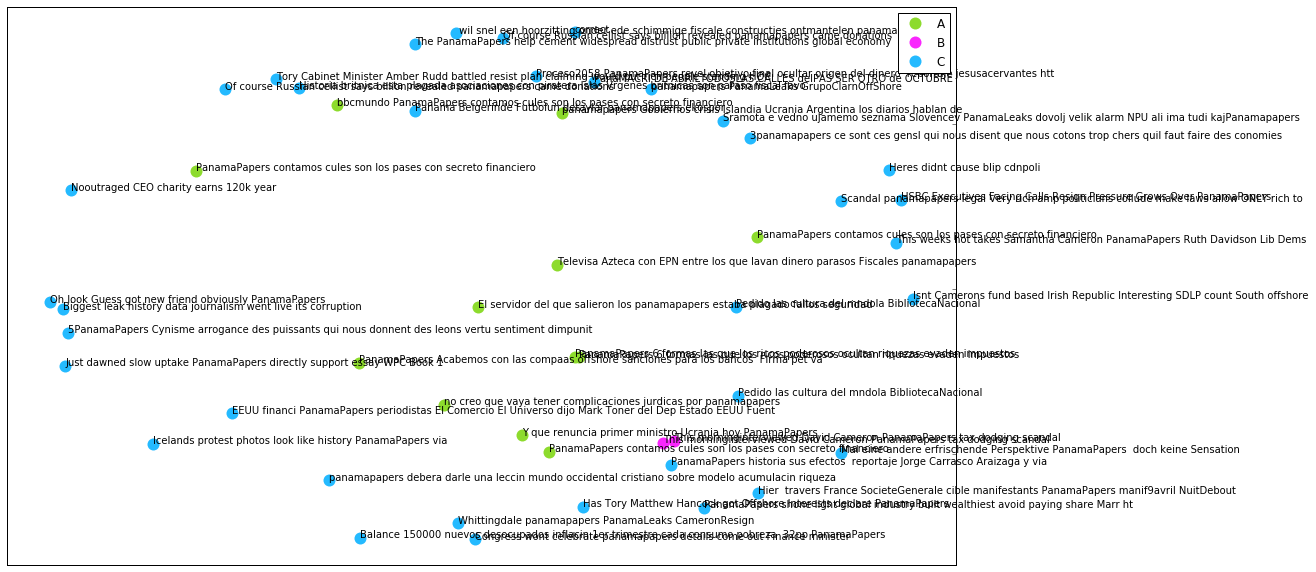

In [55]:
# Group by cluster
groups = df.groupby('label')
groups01 = df01.groupby('label')
# Set up the plot
fig, ax = plt.subplots(figsize=(17, 10))
ax.margins(0.05)
#
# Build the plot object
#
for name, group in groups01:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
        label=cluster_names[name], color=cluster_colors[name],
        mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x', # settings for x-axis
        which='both', #
        bottom='off', #
        top='off', #
        labelbottom='off')
    ax.tick_params(\
        axis= 'y', # settings for y-axis
        which='both', #
        left='off', #
        top='off', #
        labelleft='off')
ax.legend(numpoints=1) #
#
# Add label in x,y position with tweet text
#
for i in range(ix_start, ix_stop):
    ax.text(df01.ix[i]['x'], df01.ix[i]['y'], df01.ix[i]['txt'], size=10)
plt.show() # Display the plot

In [56]:
#Import the MPLD3 package to visulize the result
plt.close()
import mpld3

In [57]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [58]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=twts_df01["_source.text"])) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: 0px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

In [59]:
#Get the color and title list
color_list = []
title_list = []
for x in df.label:
    color_list.append(cluster_colors[x])
for x in df.title:
    title_list.append(x)
df_title_list = pd.DataFrame(title_list)

In [60]:
#Using Bokeh to draw the cluster result
from collections import OrderedDict
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool,ColumnDataSource

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,undo,redo,reset,tap,previewsave,box_select,poly_select,lasso_select,hover"
p = figure(plot_width=1000, plot_height=1000,tools=TOOLS)
radii=2
source = ColumnDataSource(
    data=dict(
        x=df.x*400,
        y=df.y*400,
        label=df.title
    )
)
p.circle('x', 'y', color=color_list, line_width=2, source=source)

hover =p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ("label", "@label"),
])
output_file("bokeh_output.html", title="color_scatter.py example")

show(p)  # open a browser

Cluster 0:

C:\Users\Luo\Anaconda2\lib\site-packages\wordcloud-1.2.1-py2.7-win-amd64.egg\wordcloud\wordcloud.py:291: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0 and"


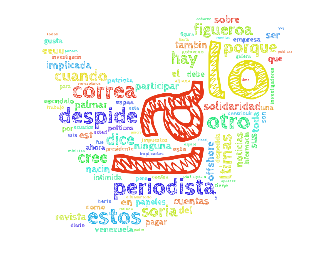

 Cluster 1:

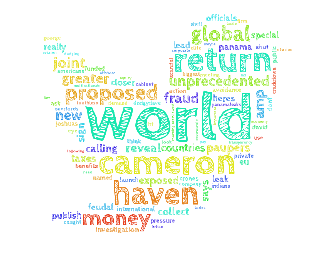

 Cluster 2:

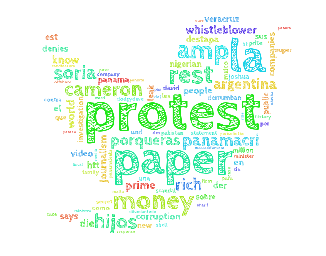

 Cluster 3:

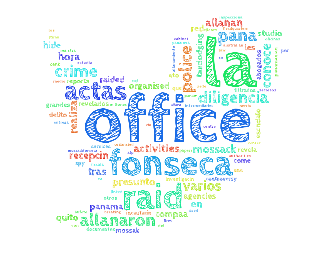

In [61]:
#Draw the word cloud
from scipy.misc import imread
from wordcloud import WordCloud
twitter_mask = imread('./twitter_mask.png', flatten=True)


for i in range(4):
    word_cloud=''
    print "Cluster %d:" % i, 
    for ind in order_centroids[i, :100]:
        word_cloud += terms[ind] + ' '
    wordcloud = WordCloud(font_path='./CabinSketch-Bold.ttf', background_color='white', width=1800, height=1400, mask=twitter_mask).generate(word_cloud)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig('./WordCloud_cluster'+ str(i) +'.png', dpi=300)
    plt.show()

In [62]:
#MDS 3 Dimentions Calculate
#Note: Due to the large size of dataset, this step will take a long time to calculate the result.

import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a three-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys, zs = pos[:, 0], pos[:, 1], pos[:, 2]
print()
print()

()
()


In [63]:
#Initialization the plotly 
#For the username and api key, you can sign up a Plotly account to use it.
#More detail you can reference in here: https://plot.ly/python/getting-started/
import plotly
plotly.tools.set_credentials_file(username='yourusername', api_key='yourapikey')
pd_threed = pd.DataFrame(dict(x=xs, y=ys, z=zs, label=clusters, txt=twts_df01["_source.text"]))

In [64]:
#Using plotly to draw 3D results
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 600).transpose()
trace1 = go.Scatter3d(
    x=xs*1000,
    y=ys*1000,
    z=zs*1000,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8,
        color= color_list
    ),
    text=title_list
)

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
data = [trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~toyota790/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


In [65]:
#Shows the size of each group
df.groupby('label').size()

label
0     5158
1      964
2    13233
3      645
dtype: int64